# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [3]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [4]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [5]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [6]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Distributions

Let's now take a look at our three measures of central tendency visually to see how they are impacted by skews and outliers. As you can see, the **Mode** will always represent the highest point or the point of highest density on the distribution plot. The **Median** will always split the dataset in half (50/50). And the **Mean** will lean towards the direction of the skew. 

A way I commonly remember "right" and "left" skew is to look at the shape and match to your feet. A `right` skewed distribution looks like your right foots and the graph on the left (positive skew) while a `left` skewed distribution looks like your left foot or the graph on the right (negative skew).

![# https://commons.wikimedia.org/wiki/File:Relationship_between_mean_and_median_under_different_skewness.png](../images/measures_central_tendency.png "Title")

The most common way to evaluate distributions is through **Histograms** which look a lot like bar charts, but have very important differences. Histograms specifically look to visualize frequency distributions where the height of the bin will tell you approx how many observations lie within that bin/bucket/range.

Let's start with `Customer Age`.

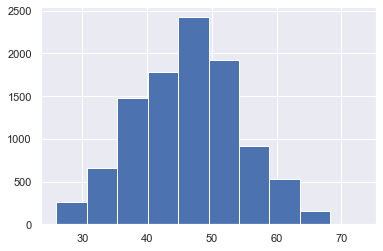

In [7]:
plt.hist(data['Customer_Age']);

`matplotlob` has many parameters you can use to customized this chart, but the most important one for histograms are `bins`. Bins are set to 10 by default and are a way to group the values together to allow a high level distribution to render. However, this is a good one to adjust if the bins are too coarse and are not allowing us to fully see the distribution. 

Based on our diagrams above, `Customer_Age` looks fairly normally distributed. Nice, this tells us that it's possible to find normally distributed data in the wild, which is good! To read this chart, the yaxis represents frequencies, or in this case Customers and the xaxis represents the age bins. So, approximately ~2400 customers are within 45-50. This is not meant to be an exact measure, but more an indication of the distribution. To get exact numbers, we will want to dig into the data, but this is our first step to guide us where to look.

Let's take a quick look at the distribution for `Months_on_book`. 

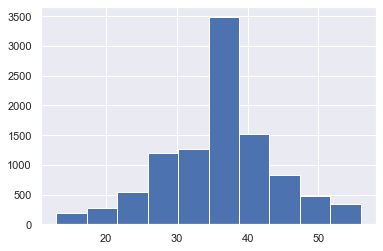

In [8]:
plt.hist(data['Months_on_book']);

It looks pretty normal outside of a very strong peak at ~36 months (roughly 3500 customers). If we had access to the owner to ask more questions about this, we would want to know if this was a **data error** (default months for those without a record), or if there was a major marketing campaign that brought in a lot of users 36 months ago. 

Now let's take a look at the `Credit_Limit` variable that we looked at before:

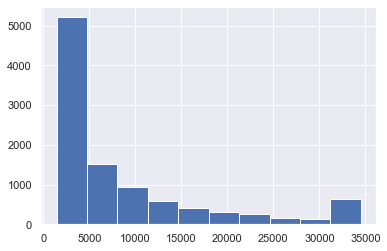

In [9]:
plt.hist(data['Credit_Limit']);

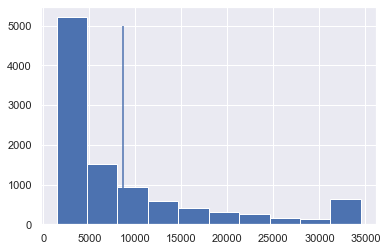

In [10]:
plt.hist(data['Credit_Limit']);
plt.vlines(data['Credit_Limit'].mean(), 0, 5000)
plt.vlines(data['Credit_Limit'].median(), 0, 5000) 

In [11]:
data['Credit_Limit'].median() # can't see the median line here...let's fix!

4549.0

Let's improve this visual a bit by increasing the `bin` size, changing the color of the lines and adding some annotations. Next, let's add a title and some x and y labels as well.  

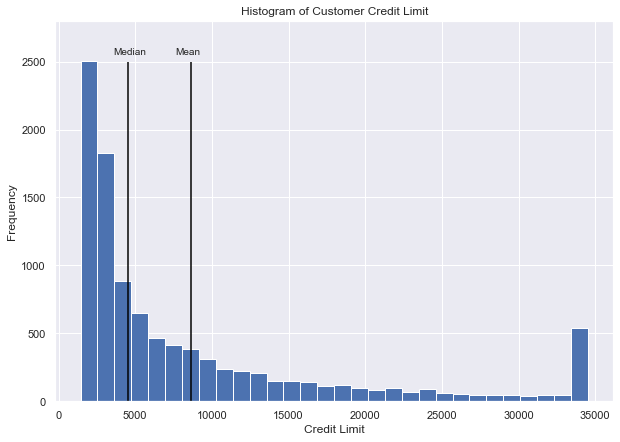

In [12]:
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins=30);

plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors='Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50, "Mean")
plt.text(data['Credit_Limit'].median()-1000, 2500+50, "Median")
plt.ylim(0, 2800);
plt.title("Histogram of Customer Credit Limit");
plt.ylabel('Frequency');
plt.xlabel('Credit Limit');

**MUCH** better. Now, it's clear that this Credit Limit is a skewed variable, being skewed higher (or to the right) by a few customers with high Credit Limits. 

Based on its relation to our feet, we know this is **right skewed**. 

Let's try `Total_Trans_Ct` that looked to have a somewhat similar mean and median. 

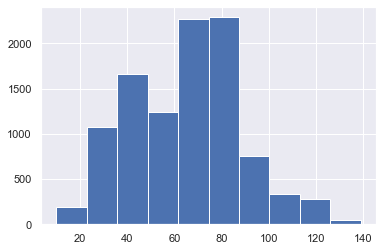

In [13]:
plt.hist(data['Total_Trans_Ct']);

It might not be obvious that this is a **bimodal** distribution, let's increase the bin size. Default is 10. Bimodal data typically will show two peaks of data-- which usually indicates you’ve got two different groups.

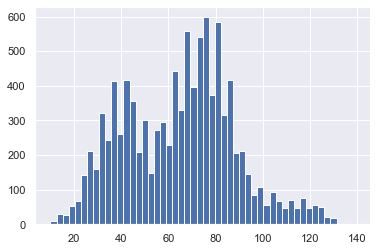

In [40]:
plt.hist(data['Total_Trans_Ct'], bins=50);